In [2]:
# importing for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


In [3]:
# importing for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
 # machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [24]:
#read train and test data set in Pandas dataframe model
train_df = pd.read_csv('C:/Users/Santanu/ML_implementation/titanic/train.csv')
test_df = pd.read_csv('C:/Users/Santanu/ML_implementation/titanic/test.csv')

In [6]:
train_df.shape

(891, 12)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gallagher, Mr. Martin",male,CA. 2343,G6,S
freq,1,577,7,4,644


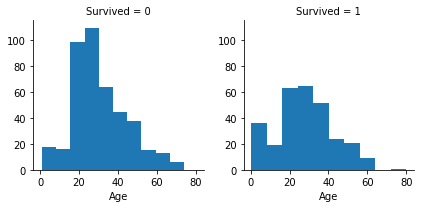

In [10]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=10)

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
df = pd.DataFrame(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False),columns=['Pclass', 'Survived'])

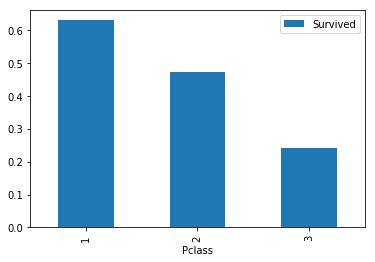

In [13]:
# Vizualisation of survival by Pclass

df.plot.bar(x='Pclass', y='Survived')

In [14]:
df1 = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [15]:
# fill the missing entry of "Age" using median value 
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


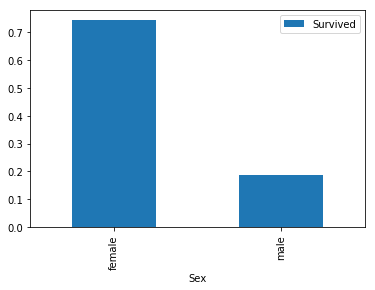

In [17]:
# Vizualisation of survival by Sex

df1.plot.bar(x='Sex', y='Survived')

In [25]:
# Merging train and test set to get better model training process
def get_merged_data():
    
    # extracting and then removing the targets from the training data 
    targets = train_df.Survived
    train_df.drop('Survived', 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train_df.append(test_df)
    combined.reset_index(inplace=True)
    combined.drop('+', inplace=True, axis=1)
    
    return combined

In [26]:
#function call to merge train & test data set
combined = get_merged_data()

In [27]:
combined.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1.0,3,male,1,A/5 21171
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,female,1,PC 17599
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3.0,3,female,0,STON/O2. 3101282
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,female,1,113803
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5.0,3,male,0,373450


In [28]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [29]:
get_titles()

In [30]:
combined.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title
0,0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1.0,3,male,1,A/5 21171,Mr
1,1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,female,1,PC 17599,Mrs
2,2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3.0,3,female,0,STON/O2. 3101282,Miss
3,3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4.0,1,female,1,113803,Mrs
4,4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5.0,3,male,0,373450,Mr


In [32]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [33]:
grouped_median_train

index   Age       Fare  Parch  PassengerId  SibSp
Sex    Pclass Title                                                     
female 1      Miss     368.0  30.0   88.25000    0.0        369.0    0.0
              Mrs      498.0  40.0   79.20000    0.0        499.0    1.0
              Officer  796.0  49.0   25.92920    0.0        797.0    0.0
              Royalty  657.5  40.5   63.05000    0.0        658.5    0.5
       2      Miss     436.5  24.0   13.00000    0.0        437.5    0.0
              Mrs      438.5  31.5   26.00000    0.0        439.5    1.0
       3      Miss     371.0  18.0    8.75625    0.0        372.0    0.0
              Mrs      404.5  31.0   15.97500    1.0        405.5    1.0
male   1      Master   445.0   4.0  120.00000    2.0        446.0    1.0
              Mr       462.0  40.0   42.40000    0.0        463.0    0.0
              Officer  647.0  51.0   35.50000    0.0        648.0    0.0
              Royalty  599.0  40.0   27.72080    0.0        600.0    0.0
       2      Master   407.0   1.0   26.00000    1.0        408.0    1.0
              Mr       439.0  31.0   13.00000    0.0        440.0    0.0
              Officer  357.5  46.5   13.00000    0.0        358.5    0.0
       3      Master   269.5   4.0   28.51250    1.0        270.5    3.5
              Mr       471.0  26.0    7.89580    0.0        472.0    0.0

In [34]:
grouped_train

In [35]:
def status(feature):

    print('Processing',feature,': ok')

In [36]:
#Fill missing ages

def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    status('age')

In [37]:
process_age()

Processing age : ok


C:\Users\Santanu\Anaconda2\envs\py3k\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
#dropping name column

def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')

In [39]:
process_names()

Processing names : ok


In [40]:
combined.head()

,index,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,22.0,NaN,S,7.2500,0,1.0,3,male,1,A/5 21171,0,0,1,0,0,0
1,1,38.0,C85,C,71.2833,0,2.0,1,female,1,PC 17599,0,0,0,1,0,0
2,2,26.0,NaN,S,7.9250,0,3.0,3,female,0,STON/O2. 3101282,0,1,0,0,0,0
3,3,35.0,C123,S,53.1000,0,4.0,1,female,1,113803,0,0,0,1,0,0
4,4,35.0,NaN,S,8.0500,0,5.0,3,male,0,373450,0,0,1,0,0,0


In [41]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)
    
    status('fare')

In [42]:
process_fares()

Processing fare : ok


C:\Users\Santanu\Anaconda2\envs\py3k\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [43]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')

In [44]:
process_embarked()

Processing embarked : ok


C:\Users\Santanu\Anaconda2\envs\py3k\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    
    status('cabin')

In [46]:
process_cabin()

Processing cabin : ok


In [47]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
index            1309 non-null int64
Age              1309 non-null float64
Fare             1309 non-null float64
Parch            1309 non-null int64
PassengerId      891 non-null float64
Pclass           1309 non-null int64
Sex              1309 non-null object
SibSp            1309 non-null int64
Ticket           1309 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint

In [48]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    
    status('sex')
process_sex()

Processing sex : ok


In [49]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

In [50]:
process_pclass()

Processing pclass : ok


In [61]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('ticket')

In [64]:
 combined.drop('Ticket', inplace=True, axis=1)

In [79]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)
    
    status('family')

In [80]:
process_family()

Processing family : ok


In [81]:
combined.drop('PassengerId', inplace=True, axis=1)

In [82]:
combined.head()

,index,Age,Fare,Parch,Sex,SibSp,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,22.0,7.2500,0,1,1,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
1,1,38.0,71.2833,0,0,1,0,0,0,1,...,0,0,0,1,0,0,2,0,1,0
2,2,26.0,7.9250,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,0
3,3,35.0,53.1000,0,0,1,0,0,0,1,...,0,0,0,1,0,0,2,0,1,0
4,4,35.0,8.0500,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,1,0,0


In [83]:
#building ML model

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

C:\Users\Santanu\Anaconda2\envs\py3k\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Santanu\Anaconda2\envs\py3k\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [84]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [85]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('C:/Users/Santanu/ML_implementation/titanic/train.csv')
    
    targets = train0.Survived
    train_df = combined.head(891)
    test_df = combined.iloc[891:]
    
    return train_df, test_df, targets

In [86]:
train_df, test_df, targets = recover_train_test_target()

In [87]:
# find feature importance with random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='auto')
clf = clf.fit(train_df, targets)

In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
index            891 non-null int64
Age              891 non-null float64
Fare             891 non-null float64
Parch            891 non-null int64
Sex              891 non-null int64
SibSp            891 non-null int64
Title_Master     891 non-null uint8
Title_Miss       891 non-null uint8
Title_Mr         891 non-null uint8
Title_Mrs        891 non-null uint8
Title_Officer    891 non-null uint8
Title_Royalty    891 non-null uint8
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
Cabin_A          891 non-null uint8
Cabin_B          891 non-null uint8
Cabin_C          891 non-null uint8
Cabin_D          891 non-null uint8
Cabin_E          891 non-null uint8
Cabin_F          891 non-null uint8
Cabin_G          891 non-null uint8
Cabin_T          891 non-null uint8
Cabin_U          891 non-null uint8
Pclass_1         891 non-nu

In [89]:
train = train_df
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

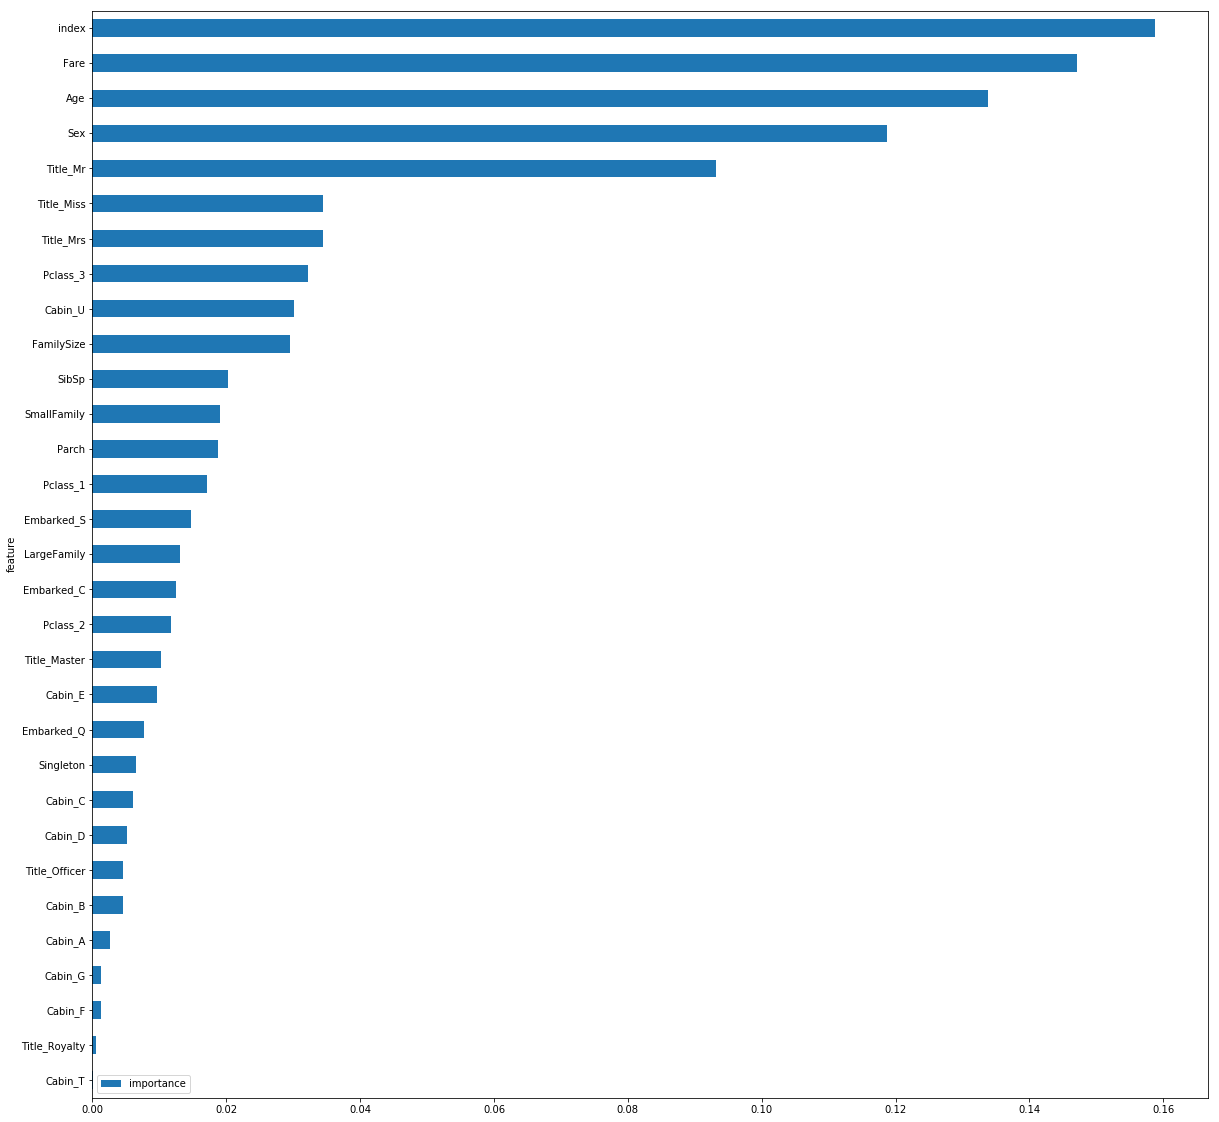

In [90]:
features.plot(kind='barh', figsize=(20, 20))

In [91]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 8)

In [92]:
test_reduced = model.transform(test_df)
test_reduced.shape

(418, 8)

In [93]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [94]:
compute_score(model, train, targets, scoring='accuracy')

0.82943133648037948

In [105]:
output = model.predict(test_df).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('C:/Users/Santanu/ML_implementation/titanic/test.csv')
df_output['PassengerId'] = aux['+']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('C:/Users/Santanu/ML_implementation/titanic/output.csv',index=False)